## Task 1 - User Overview Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
data = pd.read_excel('telcom_data.xlsx')

In [3]:
print("The shape of data is",data.shape)

The shape of data is (150001, 55)


### We can see that there are 150001 rows and 55 columns in the data set

In [4]:
data.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,2019-04-04 12:01:18,770.0,2019-04-25 14:35:31,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9164566995485190,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,2019-04-09 13:04:04,235.0,2019-04-25 08:15:48,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,2019-04-09 17:42:11,1.0,2019-04-25 11:58:13,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,2019-04-10 00:31:25,486.0,2019-04-25 07:36:35,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,2019-04-12 20:10:23,565.0,2019-04-25 10:40:32,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


### Data Description

In [5]:
#Fields	Description


#bearer id	xDr session identifier
#Dur. (ms)	Total Duration of the xDR (in ms)
#Start	Start time of the xDR (first frame timestamp)
#Start ms	Milliseconds offset of start time for the xDR (first frame timestamp)
#End	End time of the xDR (last frame timestamp)
#End ms	Milliseconds offset of end time of the xDR (last frame timestamp)
#Dur. (s)	Total Duration of the xDR (in s)
#IMSI	International Mobile Subscriber Identity
#MSISDN/Number	MS International PSTN/ISDN Number of mobile - customer number
#IMEI	International Mobile Equipment Identity
#Last Location Name	User location call name (2G/3G/4G) at the end of the bearer
#Avg RTT DL (ms)	Average Round Trip Time measurement Downlink direction (msecond)
#Avg RTT UL (ms)	Average Round Trip Time measurement Uplink direction (msecond)
#Avg Bearer TP DL (kbps)	Average Bearer Throughput for Downlink (kbps) - based on BDR duration
#Avg Bearer TP UL (kbps)	Average Bearer Throughput for uplink (kbps) - based on BDR duration
#TCP DL Retrans. Vol (Bytes)	TCP volume of Downlink packets detected as retransmitted (bytes)
#TCP UL Retrans. Vol (Bytes)	TCP volume of Uplink packets detected as retransmitted (bytes)
#DL TP < 50 Kbps (%)	Duration ratio when Bearer Downlink Throughput < ….
#50 Kbps < DL TP < 250 Kbps (%)	Duration ratio when Bearer Downlink Throughput range is …
#250 Kbps < DL TP < 1 Mbps (%)	Duration ratio when Bearer Downlink Throughput range is …
#DL TP > 1 Mbps (%)	Duration ratio when Bearer Downlink Throughput > ….
#UL TP < 10 Kbps (%)	Duration ratio when Bearer Uplink Throughput < ….
#10 Kbps < UL TP < 50 Kbps (%)	Duration ratio when Bearer Uplink Throughput range is …
#50 Kbps < UL TP < 300 Kbps (%)	Duration ratio when Bearer Uplink Throughput range is …
#UL TP > 300 Kbps (%)	Duration ratio when Bearer Uplink Throughput > ….
#HTTP DL (Bytes)	HTTP data volume (in Bytes) received by the MS during this session
#HTTP UL (Bytes)	HTTP data volume (in Bytes) sent by the MS during this session
#Activity Duration DL (ms)	Activity Duration for downlink (ms) - excluding periods of inactivity > 500 ms
#Activity Duration UL (ms)	Activity Duration for uplink (ms) - excluding periods of inactivity > 500 ms
#Dur. (ms).1	Total Duration of the xDR (in ms)
#Handset Manufacturer	Handset manufacturer 
#Handset Type	Handset type of the mobile device
#Nb of sec with 125000B < Vol DL	Number of seconds with IP Volume DL >
#Nb of sec with 1250B < Vol UL < 6250B	Number of seconds with IP Volume UL between …
#Nb of sec with 31250B < Vol DL < 125000B	Number of seconds with IP Volume DL between …
#Nb of sec with 37500B < Vol UL	Number of seconds with IP Volume UL >
#Nb of sec with 6250B < Vol DL < 31250B	Number of seconds with IP Volume DL between …
#Nb of sec with 6250B < Vol UL < 37500B	Number of seconds with IP Volume UL between …
#Nb of sec with Vol DL < 6250B	Number of seconds with IP Volume DL <
#Nb of sec with Vol UL < 1250B	Number of seconds with IP Volume UL <
#Social Media DL (Bytes)	Social Media data volume (in Bytes) received by the MS during this session
#Social Media UL (Bytes)	Social Media data volume (in Bytes) sent by the MS during this session
#YouTube DL (Bytes)	YouTube data volume (in Bytes) received by the MS during this session
#YouTube UL (Bytes)	YouTube data volume (in Bytes) sent by the MS during this session
#Netflix DL (Bytes)	Netflix data volume (in Bytes) received by the MS during this session
#Netflix UL (Bytes)	Netflix data volume (in Bytes) sent by the MS during this session
#Google DL (Bytes)	Google data volume (in Bytes) Received by the MS during this session
#Google UL (Bytes)	Google data volume (in Bytes) sent by the MS during this session
#Email DL (Bytes)	Email data volume (in Bytes) Received by the MS during this session
#Email UL (Bytes)	Email data volume (in Bytes) sent by the MS during this session
#Gaming DL (Bytes)	Gaming data volume (in Bytes) Received by the MS during this session
#Gaming UL (Bytes)	Gaming data volume (in Bytes) sent by the MS during this session
#Other DL	Other data volume (in Bytes) received by the MS during this session
#Other UL	Other data volume (in Bytes) sent by the MS during this session
#Total DL (Bytes)	Data volume (in Bytes) received by the MS during this session (IP layer + overhead)
#Total UL (Bytes)	Data volume (in Bytes) sent by the MS during this session (IP layer + overhead)


In [6]:
data.dtypes

Bearer Id                                          float64
Start                                       datetime64[ns]
Start ms                                           float64
End                                         datetime64[ns]
End ms                                             float64
Dur. (ms)                                          float64
IMSI                                               float64
MSISDN/Number                                      float64
IMEI                                               float64
Last Location Name                                  object
Avg RTT DL (ms)                                    float64
Avg RTT UL (ms)                                    float64
Avg Bearer TP DL (kbps)                            float64
Avg Bearer TP UL (kbps)                            float64
TCP DL Retrans. Vol (Bytes)                        float64
TCP UL Retrans. Vol (Bytes)                        float64
DL TP < 50 Kbps (%)                                float

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   Bearer Id                                 149010 non-null  float64       
 1   Start                                     150000 non-null  datetime64[ns]
 2   Start ms                                  150000 non-null  float64       
 3   End                                       150000 non-null  datetime64[ns]
 4   End ms                                    150000 non-null  float64       
 5   Dur. (ms)                                 150000 non-null  float64       
 6   IMSI                                      149431 non-null  float64       
 7   MSISDN/Number                             148935 non-null  float64       
 8   IMEI                                      149429 non-null  float64       
 9   Last Location N

###  Identify top 10 handsets used by customers:

In [8]:

top_10_handsets = data['Handset Type'].value_counts().head(10)
print("The Top 10 Hndsets used by customers are ")
print()
print(top_10_handsets)

The Top 10 Hndsets used by customers are 

Huawei B528S-23A                19752
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
undefined                        8987
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Name: Handset Type, dtype: int64


### Identify Top 3 Handset Manufacturers

In [9]:
top_3_manufacturers = data['Handset Manufacturer'].value_counts().head(3)
print("Top 3 Handset Manufacturers are: \n")
print(top_3_manufacturers)

Top 3 Handset Manufacturers are: 

Apple      59565
Samsung    40839
Huawei     34423
Name: Handset Manufacturer, dtype: int64


### Identify Top 5 Handsets per Top 3 Handset Manufacturers

In [10]:

top_5_handsets_Per_manufacturer = {}
for manufacturer in top_3_manufacturers.index:
    manufacturer_data=data[data['Handset Manufacturer']== manufacturer]
    top_5_handsets=manufacturer_data['Handset Type'].value_counts().head(5)
    top_5_handsets_Per_manufacturer[manufacturer] = top_5_handsets
print("\nTop 5 Handsets per Manufacturer:")
for manufacturer,top_5_Handsets in top_5_handsets_Per_manufacturer.items():
                                   print(f"\nManufacturer: {manufacturer}")
                                   print(top_5_Handsets)


Top 5 Handsets per Manufacturer:

Manufacturer: Apple
Apple iPhone 6S (A1688)    9419
Apple iPhone 6 (A1586)     9023
Apple iPhone 7 (A1778)     6326
Apple iPhone Se (A1723)    5187
Apple iPhone 8 (A1905)     4993
Name: Handset Type, dtype: int64

Manufacturer: Samsung
Samsung Galaxy S8 (Sm-G950F)    4520
Samsung Galaxy A5 Sm-A520F      3724
Samsung Galaxy J5 (Sm-J530)     3696
Samsung Galaxy J3 (Sm-J330)     3484
Samsung Galaxy S7 (Sm-G930X)    3199
Name: Handset Type, dtype: int64

Manufacturer: Huawei
Huawei B528S-23A                  19752
Huawei E5180                       2079
Huawei P20 Lite Huawei Nova 3E     2021
Huawei P20                         1480
Huawei Y6 2018                      997
Name: Handset Type, dtype: int64


### Task 1.1

Aggregate per user the following information in the column 
• number of xDR sessions
• Session duration
• the total download (DL) and upload (UL) data
• the total data volume (in Bytes) during this session for each application

In [11]:
## Fetching user Behaviour
Aggregate_data = data.loc[:,['Bearer Id','Dur. (ms)','Activity Duration DL (ms)','Activity Duration UL (ms)','Social Media DL (Bytes)','Social Media UL (Bytes)','Youtube DL (Bytes)','Youtube UL (Bytes)','Netflix DL (Bytes)','Netflix UL (Bytes)','Google DL (Bytes)','Google UL (Bytes)','Email DL (Bytes)','Email UL (Bytes)','Gaming DL (Bytes)','Gaming UL (Bytes)','Other DL (Bytes)','Other UL (Bytes)','Total DL (Bytes)','Total UL (Bytes)']]

In [12]:
Aggregate_data.rename(columns={"Bearer Id":"Xdr Sessions"})

,Xdr Sessions,Dur. (ms),Activity Duration DL (ms),Activity Duration UL (ms),Social Media DL (Bytes),Social Media UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total DL (Bytes),Total UL (Bytes)
0,1.311448e+19,1823652.0,37624.0,38787.0,1.545765e+06,24420.00000,1.585461e+07,2.501332e+06,8.198936e+06,9.656251e+06,1.634479e+06,1.271433e+06,3.563542e+06,137762.00000,2.780823e+08,1.434415e+07,1.717444e+08,8.814393e+06,308879636.0,36749741.0
1,1.311448e+19,1365104.0,168.0,3560.0,1.926113e+06,7165.00000,2.024740e+07,1.911173e+07,1.833841e+07,1.722713e+07,3.493924e+06,9.201720e+05,6.290460e+05,308339.00000,6.087501e+08,1.170709e+06,5.269042e+08,1.505514e+07,653384965.0,53800391.0
2,1.311448e+19,1361762.0,0.0,0.0,1.684053e+06,42224.00000,1.972566e+07,1.469958e+07,1.758779e+07,6.163408e+06,8.535055e+06,1.694064e+06,2.690151e+06,672973.00000,2.295846e+08,3.956300e+05,4.106926e+08,4.215763e+06,279807335.0,27883638.0
3,1.311448e+19,1321509.0,3330.0,37882.0,6.441210e+05,13372.00000,2.138812e+07,1.514664e+07,1.399465e+07,1.097942e+06,9.023734e+06,2.788027e+06,1.439754e+06,631229.00000,7.995382e+08,1.084972e+07,7.490399e+08,1.279728e+07,846028530.0,43324218.0
4,1.311448e+19,1089009.0,0.0,0.0,8.626000e+05,50188.00000,1.525938e+07,1.896287e+07,1.712458e+07,4.152180e+05,6.248284e+06,1.500559e+06,1.936496e+06,173853.00000,5.277072e+08,3.529801e+06,5.507095e+08,1.391032e+07,569138589.0,38542814.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7.277826e+18,81230.0,42376.0,41915.0,3.464974e+06,52091.00000,1.619167e+07,1.176343e+07,1.788370e+07,1.967816e+07,9.967603e+06,2.817311e+06,5.763900e+04,633237.00000,5.266097e+08,9.197207e+06,3.264510e+06,1.348742e+07,574175259.0,57628851.0
149997,7.349883e+18,97970.0,17264.0,16759.0,2.344568e+06,7613.00000,1.387723e+07,8.288284e+06,1.935015e+07,2.129315e+07,2.229420e+06,2.185941e+06,1.954414e+06,167304.00000,6.268931e+08,4.735033e+06,7.121804e+08,2.457758e+06,666648844.0,39135081.0
149998,1.311448e+19,98249.0,25003.0,28640.0,1.245845e+06,14394.00000,2.266051e+07,1.855903e+06,9.963942e+06,5.065760e+06,3.850890e+06,2.734579e+06,1.525734e+06,532543.00000,5.535395e+08,1.339432e+07,1.211009e+08,1.131473e+07,592786405.0,34912224.0
149999,1.311448e+19,97910.0,13405.0,34088.0,8.015470e+05,21562.00000,8.817106e+06,8.305402e+06,3.322253e+06,1.317259e+07,4.189773e+06,3.567494e+06,2.228270e+06,622644.00000,3.525370e+08,2.529475e+06,8.147131e+08,1.406930e+06,371895920.0,29626096.0


In [13]:
Aggregate_data

,Bearer Id,Dur. (ms),Activity Duration DL (ms),Activity Duration UL (ms),Social Media DL (Bytes),Social Media UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total DL (Bytes),Total UL (Bytes)
0,1.311448e+19,1823652.0,37624.0,38787.0,1.545765e+06,24420.00000,1.585461e+07,2.501332e+06,8.198936e+06,9.656251e+06,1.634479e+06,1.271433e+06,3.563542e+06,137762.00000,2.780823e+08,1.434415e+07,1.717444e+08,8.814393e+06,308879636.0,36749741.0
1,1.311448e+19,1365104.0,168.0,3560.0,1.926113e+06,7165.00000,2.024740e+07,1.911173e+07,1.833841e+07,1.722713e+07,3.493924e+06,9.201720e+05,6.290460e+05,308339.00000,6.087501e+08,1.170709e+06,5.269042e+08,1.505514e+07,653384965.0,53800391.0
2,1.311448e+19,1361762.0,0.0,0.0,1.684053e+06,42224.00000,1.972566e+07,1.469958e+07,1.758779e+07,6.163408e+06,8.535055e+06,1.694064e+06,2.690151e+06,672973.00000,2.295846e+08,3.956300e+05,4.106926e+08,4.215763e+06,279807335.0,27883638.0
3,1.311448e+19,1321509.0,3330.0,37882.0,6.441210e+05,13372.00000,2.138812e+07,1.514664e+07,1.399465e+07,1.097942e+06,9.023734e+06,2.788027e+06,1.439754e+06,631229.00000,7.995382e+08,1.084972e+07,7.490399e+08,1.279728e+07,846028530.0,43324218.0
4,1.311448e+19,1089009.0,0.0,0.0,8.626000e+05,50188.00000,1.525938e+07,1.896287e+07,1.712458e+07,4.152180e+05,6.248284e+06,1.500559e+06,1.936496e+06,173853.00000,5.277072e+08,3.529801e+06,5.507095e+08,1.391032e+07,569138589.0,38542814.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7.277826e+18,81230.0,42376.0,41915.0,3.464974e+06,52091.00000,1.619167e+07,1.176343e+07,1.788370e+07,1.967816e+07,9.967603e+06,2.817311e+06,5.763900e+04,633237.00000,5.266097e+08,9.197207e+06,3.264510e+06,1.348742e+07,574175259.0,57628851.0
149997,7.349883e+18,97970.0,17264.0,16759.0,2.344568e+06,7613.00000,1.387723e+07,8.288284e+06,1.935015e+07,2.129315e+07,2.229420e+06,2.185941e+06,1.954414e+06,167304.00000,6.268931e+08,4.735033e+06,7.121804e+08,2.457758e+06,666648844.0,39135081.0
149998,1.311448e+19,98249.0,25003.0,28640.0,1.245845e+06,14394.00000,2.266051e+07,1.855903e+06,9.963942e+06,5.065760e+06,3.850890e+06,2.734579e+06,1.525734e+06,532543.00000,5.535395e+08,1.339432e+07,1.211009e+08,1.131473e+07,592786405.0,34912224.0
149999,1.311448e+19,97910.0,13405.0,34088.0,8.015470e+05,21562.00000,8.817106e+06,8.305402e+06,3.322253e+06,1.317259e+07,4.189773e+06,3.567494e+06,2.228270e+06,622644.00000,3.525370e+08,2.529475e+06,8.147131e+08,1.406930e+06,371895920.0,29626096.0


In [14]:
DL_UL_Channels = ['Social Media DL (Bytes)','Social Media UL (Bytes)','Youtube DL (Bytes)','Youtube UL (Bytes)','Netflix DL (Bytes)','Netflix UL (Bytes)','Google DL (Bytes)','Google UL (Bytes)','Email DL (Bytes)','Email UL (Bytes)','Gaming DL (Bytes)','Gaming UL (Bytes)','Other DL (Bytes)','Other UL (Bytes)','Total DL (Bytes)','Total UL (Bytes)']
DL_UL_Channels_Details = [data['Social Media DL (Bytes)'].sum(),data['Social Media UL (Bytes)'].sum(),data['Youtube DL (Bytes)'].sum(),data['Youtube UL (Bytes)'].sum(),data['Netflix DL (Bytes)'].sum(),data['Netflix UL (Bytes)'].sum(),data['Google DL (Bytes)'].sum(),data['Google UL (Bytes)'].sum(),data['Email DL (Bytes)'].sum(),data['Email UL (Bytes)'].sum(),data['Gaming DL (Bytes)'].sum(),data['Gaming UL (Bytes)'].sum(),data['Other DL (Bytes)'].sum(),data['Other UL (Bytes)'].sum(),data['Total DL (Bytes)'].sum(),data['Total UL (Bytes)'].sum()]

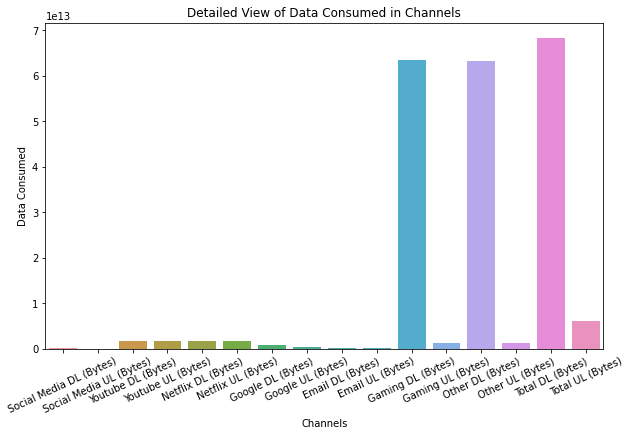

In [15]:
plt.figure(figsize=(10,6))
sns.barplot(x=DL_UL_Channels,y=DL_UL_Channels_Details)
plt.xlabel('Channels')
plt.ylabel('Data Consumed')
plt.title("Detailed View of Data Consumed in Channels")
plt.xticks(rotation = 25)
plt.savefig('Detailed View of Data Consumed in Channels')
plt.show()

#### By the above graph we can find overall user behaviour of data consumed

### Total DL and UL data

In [16]:
Total_DL = [
    data["Social Media DL (Bytes)"].sum(),
    data["Google DL (Bytes)"].sum(),
    data["Email DL (Bytes)"].sum(),
    data["Youtube DL (Bytes)"].sum(),
    data["Netflix DL (Bytes)"].sum(),
    data["Gaming DL (Bytes)"].sum(),
    data["Other DL (Bytes)"].sum()
]

Total_UL = [
    data["Social Media UL (Bytes)"].sum(),
    data["Google UL (Bytes)"].sum(),
    data["Email UL (Bytes)"].sum(),
    data["Youtube UL (Bytes)"].sum(),
    data["Netflix UL (Bytes)"].sum(),
    data["Gaming UL (Bytes)"].sum(),
    data["Other UL (Bytes)"].sum()
]



In [17]:
Total_DL

[269300061368.77365,
 862618643645.6193,
 268761121931.868,
 1745122509657.504,
 1744039384662.7188,
 63307127434008.59,
 63165502729718.195]

In [18]:
Total_UL

[4939298085.43438,
 308483345484.9263,
 70106483664.44194,
 1651422529615.1348,
 1650274224700.8196,
 1243268005008.1108,
 1239728178463.4243]

### Task 1.2

### EDA

In [19]:
Aggregate_data.head()

,Bearer Id,Dur. (ms),Activity Duration DL (ms),Activity Duration UL (ms),Social Media DL (Bytes),Social Media UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total DL (Bytes),Total UL (Bytes)
0,1.311448e+19,1823652.0,37624.0,38787.0,1545765.0,24420.0,15854611.0,2501332.0,8198936.0,9656251.0,1634479.0,1271433.0,3563542.0,137762.0,278082303.0,14344150.0,171744450.0,8814393.0,308879636.0,36749741.0
1,1.311448e+19,1365104.0,168.0,3560.0,1926113.0,7165.0,20247395.0,19111729.0,18338413.0,17227132.0,3493924.0,920172.0,629046.0,308339.0,608750074.0,1170709.0,526904238.0,15055145.0,653384965.0,53800391.0
2,1.311448e+19,1361762.0,0.0,0.0,1684053.0,42224.0,19725661.0,14699576.0,17587794.0,6163408.0,8535055.0,1694064.0,2690151.0,672973.0,229584621.0,395630.0,410692588.0,4215763.0,279807335.0,27883638.0
3,1.311448e+19,1321509.0,3330.0,37882.0,644121.0,13372.0,21388122.0,15146643.0,13994646.0,1097942.0,9023734.0,2788027.0,1439754.0,631229.0,799538153.0,10849722.0,749039933.0,12797283.0,846028530.0,43324218.0
4,1.311448e+19,1089009.0,0.0,0.0,862600.0,50188.0,15259380.0,18962873.0,17124581.0,415218.0,6248284.0,1500559.0,1936496.0,173853.0,527707248.0,3529801.0,550709500.0,13910322.0,569138589.0,38542814.0


In [20]:
Aggregate_data.shape

(150001, 20)

In [21]:
Aggregate_data.describe()

,Bearer Id,Dur. (ms),Activity Duration DL (ms),Activity Duration UL (ms),Social Media DL (Bytes),Social Media UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total DL (Bytes),Total UL (Bytes)
count,1.490100e+05,1.500000e+05,1.500000e+05,1.500000e+05,1.500010e+05,150001.000000,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,150001.000000,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500000e+05,1.500000e+05
mean,1.013887e+19,1.046086e+05,1.829177e+06,1.408880e+06,1.795322e+06,32928.434380,1.163407e+07,1.100941e+07,1.162685e+07,1.100175e+07,5.750753e+06,2.056542e+06,1.791729e+06,467373.441940,4.220447e+08,8.288398e+06,4.211005e+08,8.264799e+06,4.546434e+08,4.112121e+07
std,2.893173e+18,8.103762e+04,5.696395e+06,4.643231e+06,1.035482e+06,19006.178256,6.710569e+06,6.345423e+06,6.725218e+06,6.359490e+06,3.309097e+06,1.189917e+06,1.035840e+06,269969.307031,2.439675e+08,4.782700e+06,2.432050e+08,4.769004e+06,2.441429e+08,1.127639e+07
min,6.917538e+18,7.142000e+03,0.000000e+00,0.000000e+00,1.200000e+01,0.000000,5.300000e+01,1.050000e+02,4.200000e+01,3.500000e+01,2.070000e+02,3.000000e+00,1.400000e+01,2.000000,2.516000e+03,5.900000e+01,3.290000e+03,1.480000e+02,7.114041e+06,2.866892e+06
25%,7.349883e+18,5.744050e+04,1.487775e+04,2.153975e+04,8.991480e+05,16448.000000,5.833501e+06,5.517965e+06,5.777156e+06,5.475981e+06,2.882393e+06,1.024279e+06,8.927930e+05,233383.000000,2.104733e+08,4.128476e+06,2.101869e+08,4.145943e+06,2.431068e+08,3.322201e+07
50%,7.349883e+18,8.639900e+04,3.930450e+04,4.679350e+04,1.794369e+06,32920.000000,1.161602e+07,1.101345e+07,1.164222e+07,1.099638e+07,5.765829e+06,2.054573e+06,1.793505e+06,466250.000000,4.234081e+08,8.291208e+06,4.218030e+08,8.267071e+06,4.558411e+08,4.114331e+07
75%,1.304243e+19,1.324302e+05,6.796095e+05,5.990952e+05,2.694938e+06,49334.000000,1.744852e+07,1.651556e+07,1.747048e+07,1.650727e+07,8.623552e+06,3.088454e+06,2.689327e+06,700440.000000,6.331742e+08,1.243162e+07,6.316918e+08,1.238415e+07,6.657055e+08,4.903424e+07
max,1.318654e+19,1.859336e+06,1.365365e+08,1.449113e+08,3.586064e+06,65870.000000,2.325910e+07,2.201196e+07,2.325919e+07,2.201196e+07,1.146283e+07,4.121357e+06,3.586146e+06,936418.000000,8.434419e+08,1.655879e+07,8.434425e+08,1.655882e+07,9.029696e+08,7.833131e+07


In [22]:
Aggregate_data.dtypes

Bearer Id                    float64
Dur. (ms)                    float64
Activity Duration DL (ms)    float64
Activity Duration UL (ms)    float64
Social Media DL (Bytes)      float64
Social Media UL (Bytes)      float64
Youtube DL (Bytes)           float64
Youtube UL (Bytes)           float64
Netflix DL (Bytes)           float64
Netflix UL (Bytes)           float64
Google DL (Bytes)            float64
Google UL (Bytes)            float64
Email DL (Bytes)             float64
Email UL (Bytes)             float64
Gaming DL (Bytes)            float64
Gaming UL (Bytes)            float64
Other DL (Bytes)             float64
Other UL (Bytes)             float64
Total DL (Bytes)             float64
Total UL (Bytes)             float64
dtype: object

In [23]:
Aggregate_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 20 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Bearer Id                  149010 non-null  float64
 1   Dur. (ms)                  150000 non-null  float64
 2   Activity Duration DL (ms)  150000 non-null  float64
 3   Activity Duration UL (ms)  150000 non-null  float64
 4   Social Media DL (Bytes)    150001 non-null  float64
 5   Social Media UL (Bytes)    150001 non-null  float64
 6   Youtube DL (Bytes)         150001 non-null  float64
 7   Youtube UL (Bytes)         150001 non-null  float64
 8   Netflix DL (Bytes)         150001 non-null  float64
 9   Netflix UL (Bytes)         150001 non-null  float64
 10  Google DL (Bytes)          150001 non-null  float64
 11  Google UL (Bytes)          150001 non-null  float64
 12  Email DL (Bytes)           150001 non-null  float64
 13  Email UL (Bytes)           15

In [24]:
total_number_of_rows = Aggregate_data.shape[0]
for col,val in zip(Aggregate_data.isnull().sum().index,data.isnull().sum().values):
   
    null_value_percent  = (val/Aggregate_data.shape[0])*100
    print("Null value count percent for {} is {}%:".format(col,null_value_percent))

Null value count percent for Bearer Id is 0.660662262251585%:
Null value count percent for Dur. (ms) is 0.0006666622222518516%:
Null value count percent for Activity Duration DL (ms) is 0.0006666622222518516%:
Null value count percent for Activity Duration UL (ms) is 0.0006666622222518516%:
Null value count percent for Social Media DL (Bytes) is 0.0006666622222518516%:
Null value count percent for Social Media UL (Bytes) is 0.0006666622222518516%:
Null value count percent for Youtube DL (Bytes) is 0.37999746668355544%:
Null value count percent for Youtube UL (Bytes) is 0.7106619289204739%:
Null value count percent for Netflix DL (Bytes) is 0.3813307911280592%:
Null value count percent for Netflix UL (Bytes) is 0.7686615422563849%:
Null value count percent for Google DL (Bytes) is 18.55254298304678%:
Null value count percent for Google UL (Bytes) is 18.541209725268498%:
Null value count percent for Email DL (Bytes) is 0.0006666622222518516%:
Null value count percent for Email UL (Bytes)

In [25]:
###Treating Null Values

def preprocessing(data):
    categorical_cols = []
    continious_cols = []
    for col in data.columns:
        if data[col].dtypes == "object":
            categorical_cols.append(col)
            data[col].fillna(data[col].mode()[0], inplace = True)
            
        else:
            data[col].fillna(data[col].mean(), inplace = True)
            continious_cols.append(col)
    return categorical_cols,continious_cols, data

categorical_cols,continious_cols, data_preprocessed = preprocessing(Aggregate_data)


In [26]:
Aggregate_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 20 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Bearer Id                  150001 non-null  float64
 1   Dur. (ms)                  150001 non-null  float64
 2   Activity Duration DL (ms)  150001 non-null  float64
 3   Activity Duration UL (ms)  150001 non-null  float64
 4   Social Media DL (Bytes)    150001 non-null  float64
 5   Social Media UL (Bytes)    150001 non-null  float64
 6   Youtube DL (Bytes)         150001 non-null  float64
 7   Youtube UL (Bytes)         150001 non-null  float64
 8   Netflix DL (Bytes)         150001 non-null  float64
 9   Netflix UL (Bytes)         150001 non-null  float64
 10  Google DL (Bytes)          150001 non-null  float64
 11  Google UL (Bytes)          150001 non-null  float64
 12  Email DL (Bytes)           150001 non-null  float64
 13  Email UL (Bytes)           15

In [27]:
for i in data.columns:
    print("*"*50)
    print("The datatype for {} is {}".format(i,data[i].dtypes))
    # check if the datatype is object or not
    if data[i].dtypes == "object":
        print("Top 10 categories for ", i )
        print(data[i].value_counts().sort_values(ascending = False).head(10))
        print("*"*50)

**************************************************
The datatype for Bearer Id is float64
**************************************************
The datatype for Start is datetime64[ns]
**************************************************
The datatype for Start ms is float64
**************************************************
The datatype for End is datetime64[ns]
**************************************************
The datatype for End ms is float64
**************************************************
The datatype for Dur. (ms) is float64
**************************************************
The datatype for IMSI is float64
**************************************************
The datatype for MSISDN/Number is float64
**************************************************
The datatype for IMEI is float64
**************************************************
The datatype for Last Location Name is object
Top 10 categories for  Last Location Name
D41377B             80
D17085A             59
D72396C             

In [28]:
for i in data.columns:
    print("*"*50)
    print("The datatype for {} is {}".format(i,data[i].dtypes))
    # check if the datatype is object or not
    if data[i].dtypes == "object":
        print("Bottom 10 categories for ", i )
        print(data[i].value_counts().sort_values(ascending = True).head(10))
        print("*"*50)

**************************************************
The datatype for Bearer Id is float64
**************************************************
The datatype for Start is datetime64[ns]
**************************************************
The datatype for Start ms is float64
**************************************************
The datatype for End is datetime64[ns]
**************************************************
The datatype for End ms is float64
**************************************************
The datatype for Dur. (ms) is float64
**************************************************
The datatype for IMSI is float64
**************************************************
The datatype for MSISDN/Number is float64
**************************************************
The datatype for IMEI is float64
**************************************************
The datatype for Last Location Name is object
Bottom 10 categories for  Last Location Name
L88342B    1
T74142A    1
L10853A    1
T73573A    1
T21914B    

In [29]:
# Univariate Analysis for Categorical data
categorical_data = []
for col in data.columns:
    if data[col].dtypes == "object":
        categorical_data.append(col)

In [30]:
categorical_data

['Last Location Name', 'Handset Manufacturer', 'Handset Type']

**************************************************
Top 10 categories for Last Location Name
D41377B             80
D17085A             59
D72396C             57
9164566985995010    55
D73604C             55
D11119B             54
9164567013049100    51
L41377B             51
D11002B             50
L70357B             46
Name: Last Location Name, dtype: int64


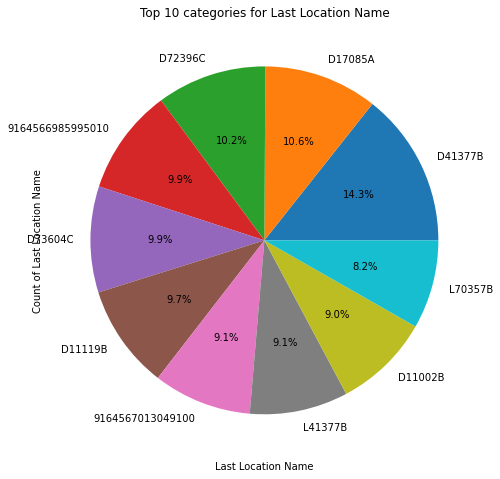

**************************************************
**************************************************
Top 10 categories for Handset Manufacturer
Apple                                   59565
Samsung                                 40839
Huawei                                  34423
undefined                                8987
Sony Mobile Communications Ab             980
Wiko Global Sasu                          747
Xiaomi Communications Co Ltd              397
Oneplus Technology (Shenzhen) Co Ltd      342
Asustek                                   285
Lenovo                                    254
Name: Handset Manufacturer, dtype: int64


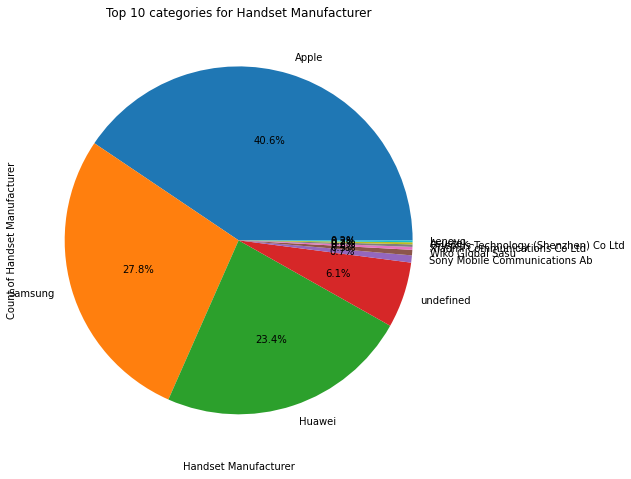

**************************************************
**************************************************
Top 10 categories for Handset Type
Huawei B528S-23A                19752
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
undefined                        8987
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Name: Handset Type, dtype: int64


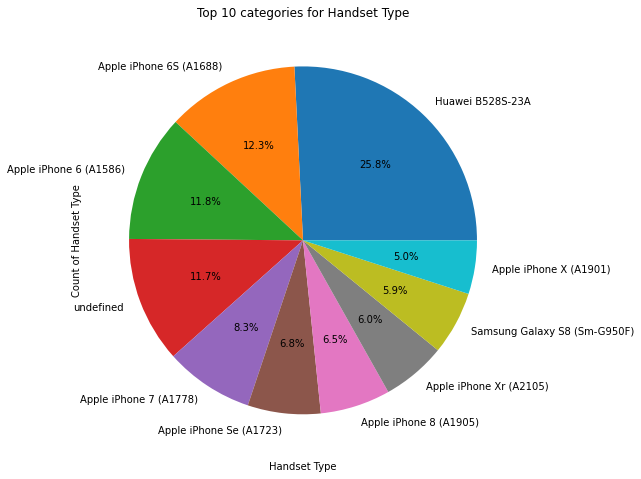

**************************************************


In [31]:
for col in categorical_data:
    print("*"*50)
    print("Top 10 categories for {}".format(col))
    print(data[col].value_counts().sort_values(ascending = False).head(10))
    index = data[col].value_counts().sort_values(ascending = False).head(10).index
    values = data[col].value_counts().sort_values(ascending = False).head(10).values
    plt.figure(figsize = [15,8])
    
   
    plt.pie(values, labels = index,autopct = '%.1f%%')
    plt.xlabel(col)
    plt.ylabel("Count of {}".format(col))
    plt.title("Top 10 categories for {}".format(col))
    plt.grid()
    plt.savefig("Top_10_categories_for_{}.png".format(col))
    plt.show();
    print("*"*50)

In [32]:
### Analysis of Numerical Columns; All important numerical columns are in Aggregate_data, So directly we can do EDA on Aggregate_data to get insights of the numerical features
numerical_columns= []
for col in Aggregate_data.columns:
    if Aggregate_data[col].dtypes != "object":
        numerical_columns.append(col)

In [33]:
numerical_columns

['Bearer Id',
 'Dur. (ms)',
 'Activity Duration DL (ms)',
 'Activity Duration UL (ms)',
 'Social Media DL (Bytes)',
 'Social Media UL (Bytes)',
 'Youtube DL (Bytes)',
 'Youtube UL (Bytes)',
 'Netflix DL (Bytes)',
 'Netflix UL (Bytes)',
 'Google DL (Bytes)',
 'Google UL (Bytes)',
 'Email DL (Bytes)',
 'Email UL (Bytes)',
 'Gaming DL (Bytes)',
 'Gaming UL (Bytes)',
 'Other DL (Bytes)',
 'Other UL (Bytes)',
 'Total DL (Bytes)',
 'Total UL (Bytes)']

In [34]:
### Checking the Skewness of the Data
Aggregate_data.skew()

Bearer Id                    0.026755
Dur. (ms)                    3.952622
Activity Duration DL (ms)    5.872275
Activity Duration UL (ms)    7.382581
Social Media DL (Bytes)     -0.002136
Social Media UL (Bytes)     -0.000359
Youtube DL (Bytes)           0.000231
Youtube UL (Bytes)          -0.001142
Netflix DL (Bytes)          -0.002442
Netflix UL (Bytes)          -0.000113
Google DL (Bytes)           -0.008092
Google UL (Bytes)            0.002216
Email DL (Bytes)            -0.002463
Email UL (Bytes)             0.007358
Gaming DL (Bytes)           -0.003460
Gaming UL (Bytes)           -0.001840
Other DL (Bytes)             0.001400
Other UL (Bytes)             0.001392
Total DL (Bytes)            -0.003153
Total UL (Bytes)            -0.002456
dtype: float64

###### The following features are positively skewed:- Bearer Id,Dur. (ms),Activity Duration DL (ms),Activity Duration UL (ms),Youtube DL(Bytes),Google UL (Bytes),Email UL (Bytes),Other DL (Bytes),Other UL (Bytes)
###### The following features are negatively skewed:-Social Media DL (Bytes),Social Media UL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Google DL (Bytes),Email DL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Total DL (Bytes),Total UL (Bytes)

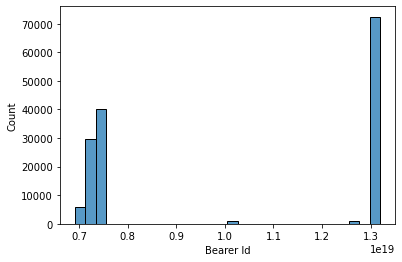

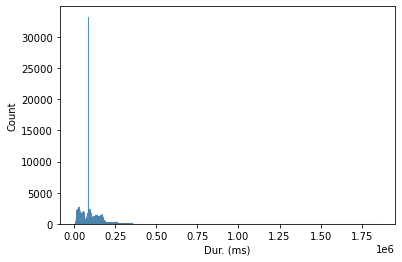

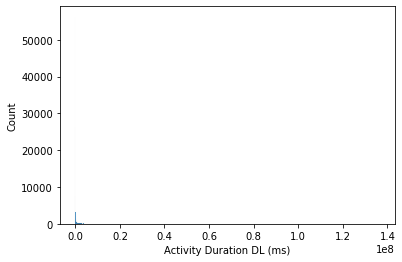

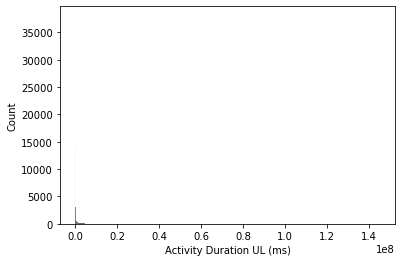

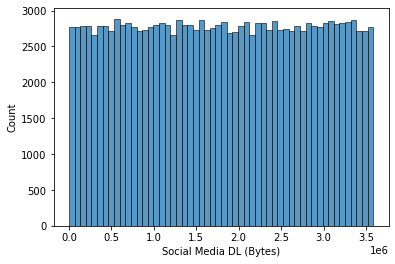

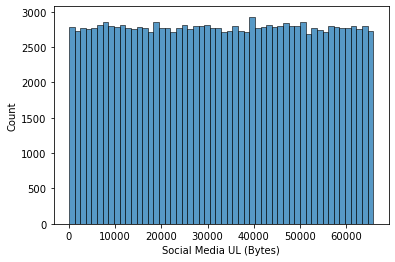

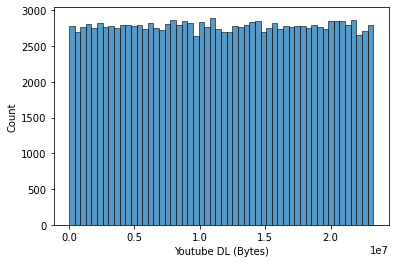

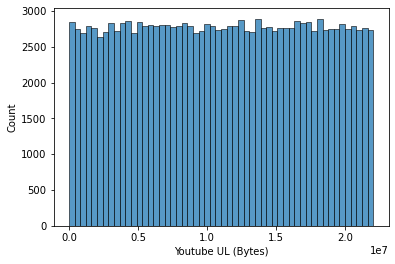

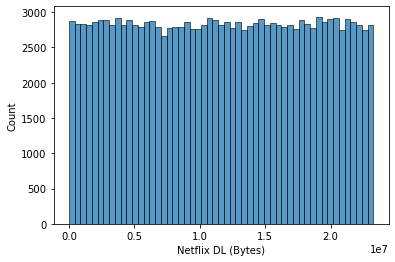

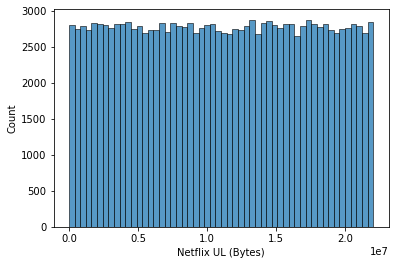

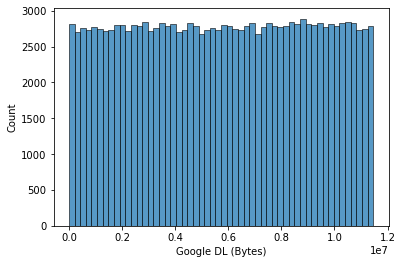

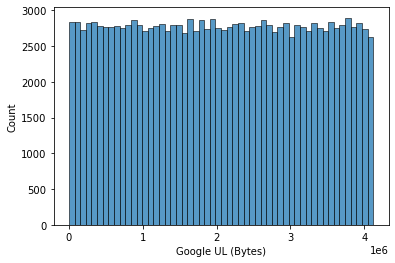

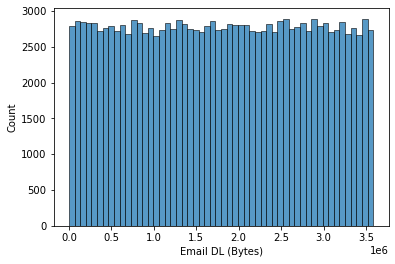

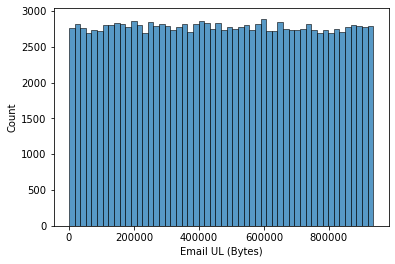

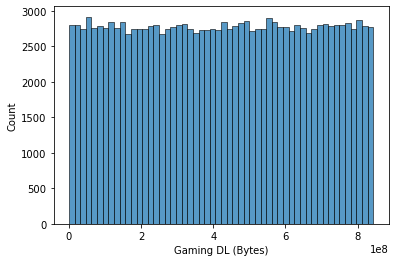

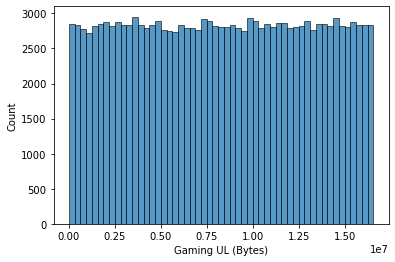

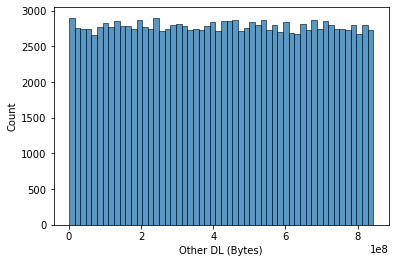

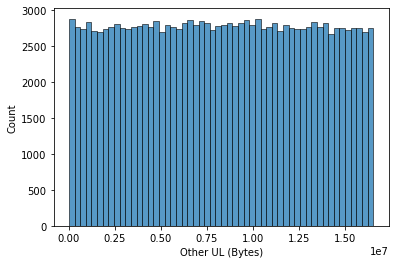

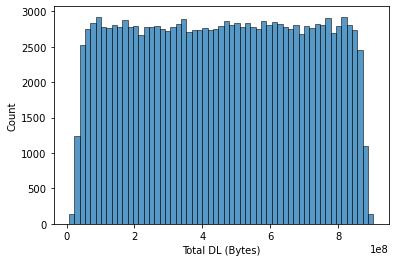

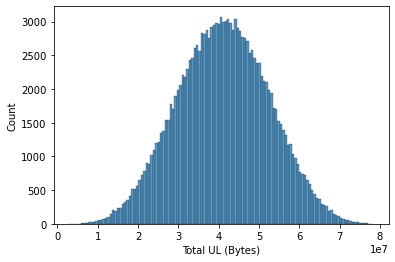

In [35]:
for col in numerical_columns:
    sns.histplot(data = Aggregate_data , x = col)
    plt.savefig("Count of {}.png".format(col))
    plt.show();

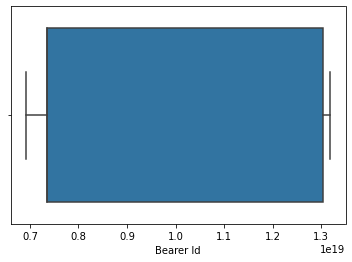

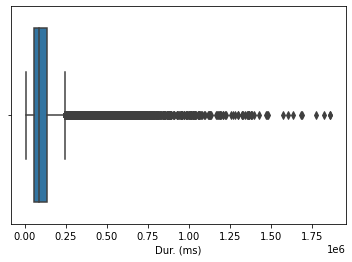

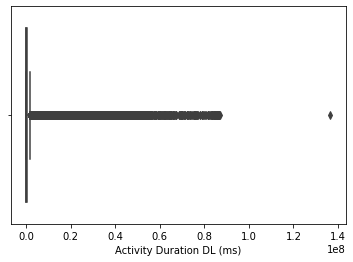

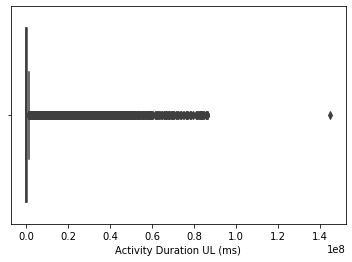

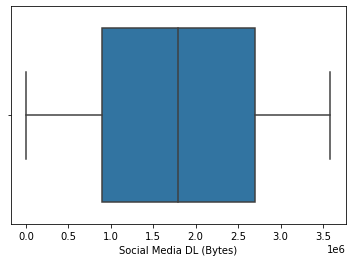

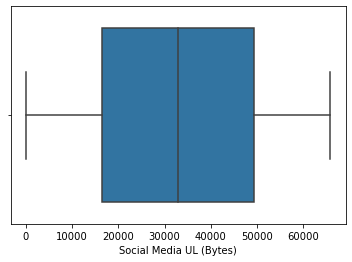

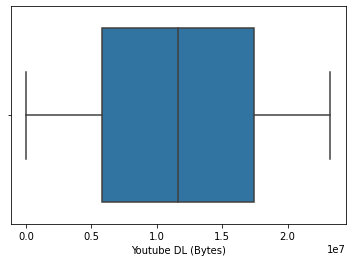

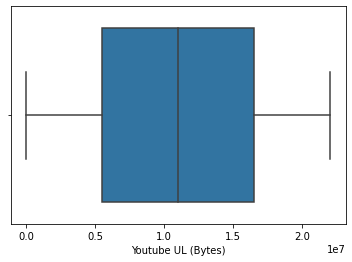

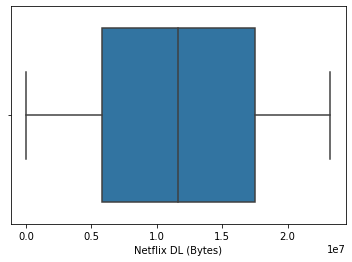

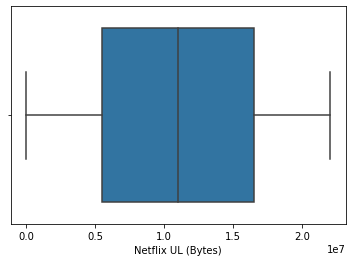

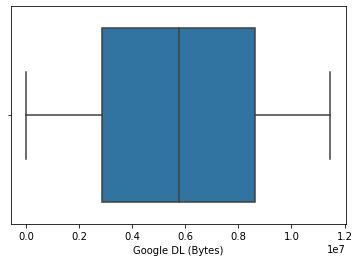

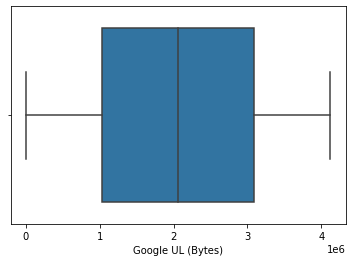

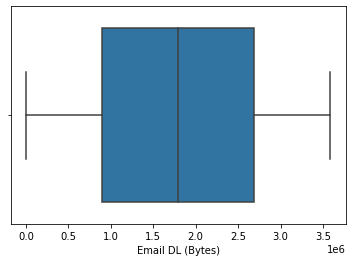

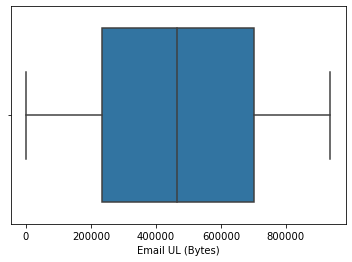

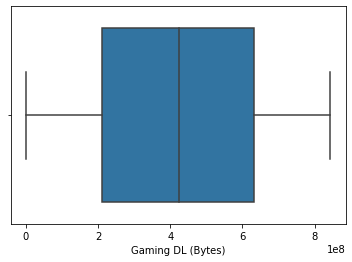

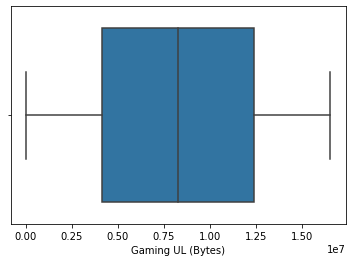

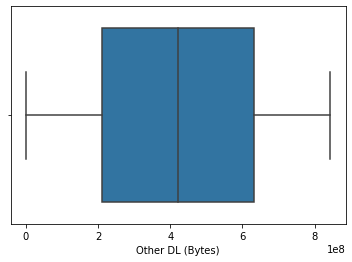

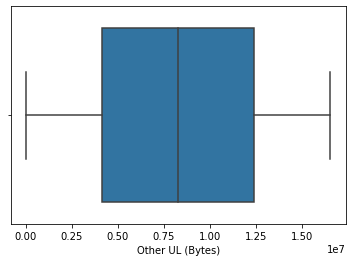

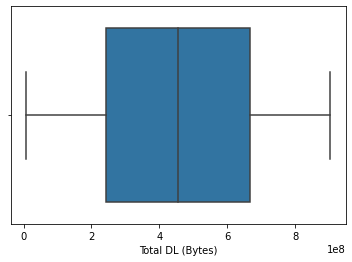

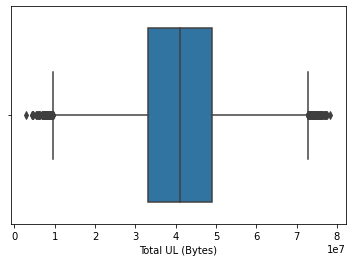

In [36]:
for col in numerical_columns:
    sns.boxplot(data = Aggregate_data , x = col)
    plt.savefig("Count of {}.png".format(col))
    plt.show();

### Correlation Analysis

In [39]:
Aggregate_data.corr()

,Bearer Id,Dur. (ms),Activity Duration DL (ms),Activity Duration UL (ms),Social Media DL (Bytes),Social Media UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total DL (Bytes),Total UL (Bytes)
Bearer Id,1.000000,0.007492,0.081474,0.069138,-0.000842,-0.001121,-0.002458,-0.000701,-0.000620,-0.003712,-0.000691,0.002249,0.002617,-0.000327,0.000485,-0.003201,0.000940,-0.002233,0.000399,-0.004562
Dur. (ms),0.007492,1.000000,-0.072672,-0.065697,-0.002716,-0.001286,0.003853,0.002211,-0.001834,-0.005517,0.001228,-0.003466,0.003956,-0.001271,0.000691,0.001841,-0.000404,0.001101,0.000768,-0.001019
Activity Duration DL (ms),0.081474,-0.072672,1.000000,0.904458,0.002940,-0.000238,0.003020,0.000283,-0.000915,-0.001280,-0.003128,-0.000106,0.001592,0.002297,-0.003634,0.000112,0.008716,0.001397,-0.003596,0.000119
Activity Duration UL (ms),0.069138,-0.065697,0.904458,1.000000,0.003082,-0.000679,0.005030,0.002466,0.000532,-0.000018,-0.001576,-0.001890,0.002223,0.000600,-0.002936,0.000817,0.007874,0.001899,-0.002780,0.002341
Social Media DL (Bytes),-0.000842,-0.002716,0.002940,0.003082,1.000000,-0.000555,-0.001389,0.002345,-0.001817,0.003457,-0.001954,0.000186,0.004745,-0.002518,0.001018,0.003095,0.006126,0.000610,0.005164,0.004798
Social Media UL (Bytes),-0.001121,-0.001286,-0.000238,-0.000679,-0.000555,1.000000,-0.001786,-0.002368,-0.000772,-0.002493,0.003542,0.001085,0.004823,-0.001427,0.000210,0.000844,-0.003850,0.000971,0.000206,-0.000204
Youtube DL (Bytes),-0.002458,0.003853,0.003020,0.005030,-0.001389,-0.001786,1.000000,0.002433,0.001202,0.001746,0.001760,0.001122,0.001679,-0.000320,-0.001861,-0.001893,0.002042,-0.004830,0.025685,-0.000384
Youtube UL (Bytes),-0.000701,0.002211,0.000283,0.002466,0.002345,-0.002368,0.002433,1.000000,0.000423,0.002477,0.000638,0.001670,-0.004305,-0.006834,-0.002382,0.000898,0.002296,-0.001393,-0.002301,0.563917
Netflix DL (Bytes),-0.000620,-0.001834,-0.000915,0.000532,-0.001817,-0.000772,0.001202,0.000423,1.000000,0.001065,0.000548,-0.001288,0.001351,-0.000011,-0.003201,-0.000633,-0.006000,-0.002588,0.024386,-0.000662
Netflix UL (Bytes),-0.003712,-0.005517,-0.001280,-0.000018,0.003457,-0.002493,0.001746,0.002477,0.001065,1.000000,-0.001569,-0.004073,-0.000016,0.000532,-0.001051,-0.004015,-0.006691,-0.003447,-0.000979,0.561779


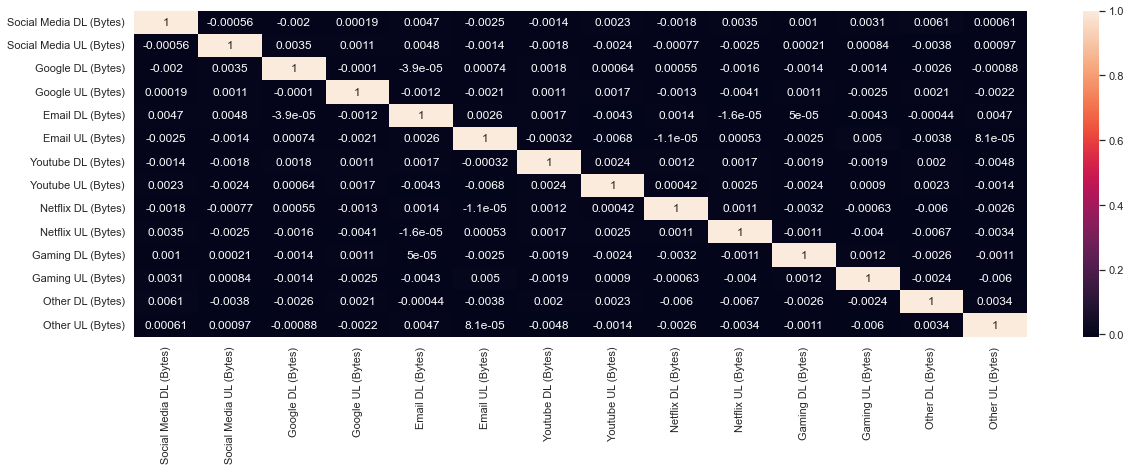

In [55]:
Correlation_Matrix = Aggregate_data[["Social Media DL (Bytes)", "Social Media UL (Bytes)", "Google DL (Bytes)", "Google UL (Bytes)",
"Email DL (Bytes)", "Email UL (Bytes)", "Youtube DL (Bytes)", "Youtube UL (Bytes)", "Netflix DL (Bytes)",    
"Netflix UL (Bytes)","Gaming DL (Bytes)", "Gaming UL (Bytes)", "Other DL (Bytes)" , "Other UL (Bytes)"]]



sns.heatmap(Correlation_Matrix.corr(),annot=True)
sns.set(rc={'figure.figsize':(70,6)})
plt.savefig("Correlation_Matrix.png")
plt.show()

In [54]:
### Bivariate Analysis

    
    
print(data.groupby(by= ['Bearer Id'])['Total UL (Bytes)','Total DL (Bytes)'].count().sort_values(by=i,ascending = False).head(10))
print(data.groupby(by= ['Dur. (ms)'])['Total UL (Bytes)','Total DL (Bytes)'].count().sort_values(by=i,ascending = False).head(10))
print(data.groupby(by= ['Activity Duration DL (ms)'])['Total UL (Bytes)','Total DL (Bytes)'].count().sort_values(by=i,ascending = False).head(10))
print(data.groupby(by= ['Activity Duration UL (ms)'])['Total UL (Bytes)','Total DL (Bytes)'].count().sort_values(by=i,ascending = False).head(10))
print(data.groupby(by= ['Social Media DL (Bytes)'])['Total UL (Bytes)','Total DL (Bytes)'].count().sort_values(by=i,ascending = False).head(10))
print(data.groupby(by= ['Social Media UL (Bytes)'])['Total UL (Bytes)','Total DL (Bytes)'].count().sort_values(by=i,ascending = False).head(10))
print(data.groupby(by= ['Youtube DL (Bytes)'])['Total UL (Bytes)','Total DL (Bytes)'].count().sort_values(by=i,ascending = False).head(10))
print(data.groupby(by= ['Youtube UL (Bytes)'])['Total UL (Bytes)','Total DL (Bytes)'].count().sort_values(by=i,ascending = False).head(10))
print(data.groupby(by= ['Netflix DL (Bytes)'])['Total UL (Bytes)','Total DL (Bytes)'].count().sort_values(by=i,ascending = False).head(10))
print(data.groupby(by= ['Netflix UL (Bytes)'])['Total UL (Bytes)','Total DL (Bytes)'].count().sort_values(by=i,ascending = False).head(10))
print(data.groupby(by= ['Google DL (Bytes)'])['Total UL (Bytes)','Total DL (Bytes)'].count().sort_values(by=i,ascending = False).head(10))
print(data.groupby(by= ['Google UL (Bytes)'])['Total UL (Bytes)','Total DL (Bytes)'].count().sort_values(by=i,ascending = False).head(10))
print(data.groupby(by= ['Email DL (Bytes)'])['Total UL (Bytes)','Total DL (Bytes)'].count().sort_values(by=i,ascending = False).head(10))
print(data.groupby(by= ['Email UL (Bytes)'])['Total UL (Bytes)','Total DL (Bytes)'].count().sort_values(by=i,ascending = False).head(10))
print(data.groupby(by= ['Gaming DL (Bytes)'])['Total UL (Bytes)','Total DL (Bytes)'].count().sort_values(by=i,ascending = False).head(10))
print(data.groupby(by= ['Gaming UL (Bytes)'])['Total UL (Bytes)','Total DL (Bytes)'].count().sort_values(by=i,ascending = False).head(10))
print(data.groupby(by= ['Other DL (Bytes)'])['Total UL (Bytes)','Total DL (Bytes)'].count().sort_values(by=i,ascending = False).head(10))
print(data.groupby(by= ['Other UL (Bytes)'])['Total UL (Bytes)','Total DL (Bytes)'].count().sort_values(by=i,ascending = False).head(10))


C:\Users\sneha\AppData\Local\Temp\ipykernel_15704\3614237375.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(data.groupby(by= ['Bearer Id'])['Total UL (Bytes)','Total DL (Bytes)'].count().sort_values(by=i,ascending = False).head(10))
C:\Users\sneha\AppData\Local\Temp\ipykernel_15704\3614237375.py:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(data.groupby(by= ['Dur. (ms)'])['Total UL (Bytes)','Total DL (Bytes)'].count().sort_values(by=i,ascending = False).head(10))


              Total UL (Bytes)  Total DL (Bytes)
Bearer Id                                       
1.304243e+19                16                16
1.304243e+19                10                10
1.304243e+19                 9                 9
1.304243e+19                 9                 9
1.304243e+19                 9                 9
1.304243e+19                 9                 9
1.304243e+19                 8                 8
1.311448e+19                 8                 8
1.304243e+19                 8                 8
1.304243e+19                 8                 8
           Total UL (Bytes)  Total DL (Bytes)
Dur. (ms)                                    
86399.0               21413             21413
86400.0                6437              6437
85499.0                 188               188
86398.0                 145               145
86397.0                 110               110
85800.0                 105               105
172800.0                 92                9

C:\Users\sneha\AppData\Local\Temp\ipykernel_15704\3614237375.py:7: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(data.groupby(by= ['Activity Duration DL (ms)'])['Total UL (Bytes)','Total DL (Bytes)'].count().sort_values(by=i,ascending = False).head(10))
C:\Users\sneha\AppData\Local\Temp\ipykernel_15704\3614237375.py:8: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(data.groupby(by= ['Activity Duration UL (ms)'])['Total UL (Bytes)','Total DL (Bytes)'].count().sort_values(by=i,ascending = False).head(10))


                           Total UL (Bytes)  Total DL (Bytes)
Activity Duration DL (ms)                                    
0.0                                    7278              7278
1.0                                      21                21
2.0                                      13                13
636.0                                    13                13
654.0                                    13                13
508.0                                    13                13
711.0                                    12                12
671.0                                    11                11
476.0                                    11                11
741.0                                    11                11
                           Total UL (Bytes)  Total DL (Bytes)
Activity Duration UL (ms)                                    
0.0                                    5186              5186
1.0                                      31                31
8.0     

C:\Users\sneha\AppData\Local\Temp\ipykernel_15704\3614237375.py:9: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(data.groupby(by= ['Social Media DL (Bytes)'])['Total UL (Bytes)','Total DL (Bytes)'].count().sort_values(by=i,ascending = False).head(10))


                         Total UL (Bytes)  Total DL (Bytes)
Social Media DL (Bytes)                                    
2421085.0                               3                 3
2106903.0                               3                 3
2586604.0                               3                 3
3051716.0                               3                 3
2334058.0                               3                 3
2925612.0                               3                 3
2788848.0                               3                 3
1014677.0                               3                 3
2954713.0                               3                 3
3584126.0                               3                 3
                         Total UL (Bytes)  Total DL (Bytes)
Social Media UL (Bytes)                                    
56229.0                                11                11
55156.0                                11                11
30810.0                                1

C:\Users\sneha\AppData\Local\Temp\ipykernel_15704\3614237375.py:10: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(data.groupby(by= ['Social Media UL (Bytes)'])['Total UL (Bytes)','Total DL (Bytes)'].count().sort_values(by=i,ascending = False).head(10))
C:\Users\sneha\AppData\Local\Temp\ipykernel_15704\3614237375.py:11: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(data.groupby(by= ['Youtube DL (Bytes)'])['Total UL (Bytes)','Total DL (Bytes)'].count().sort_values(by=i,ascending = False).head(10))


                    Total UL (Bytes)  Total DL (Bytes)
Youtube DL (Bytes)                                    
18869169.0                         3                 3
15192147.0                         2                 2
13920466.0                         2                 2
23151577.0                         2                 2
12669220.0                         2                 2
14261257.0                         2                 2
17753318.0                         2                 2
11515878.0                         2                 2
6499326.0                          2                 2
16961859.0                         2                 2
                    Total UL (Bytes)  Total DL (Bytes)
Youtube UL (Bytes)                                    
3398443.0                          3                 3
9040079.0                          2                 2
430221.0                           2                 2
9399562.0                          2                 2
11816425.0

C:\Users\sneha\AppData\Local\Temp\ipykernel_15704\3614237375.py:12: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(data.groupby(by= ['Youtube UL (Bytes)'])['Total UL (Bytes)','Total DL (Bytes)'].count().sort_values(by=i,ascending = False).head(10))
C:\Users\sneha\AppData\Local\Temp\ipykernel_15704\3614237375.py:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(data.groupby(by= ['Netflix DL (Bytes)'])['Total UL (Bytes)','Total DL (Bytes)'].count().sort_values(by=i,ascending = False).head(10))


                    Total UL (Bytes)  Total DL (Bytes)
Netflix DL (Bytes)                                    
2097111.0                          3                 3
21562160.0                         2                 2
7521423.0                          2                 2
7908490.0                          2                 2
12009564.0                         2                 2
10493876.0                         2                 2
2677760.0                          2                 2
15939587.0                         2                 2
16280025.0                         2                 2
22046998.0                         2                 2


C:\Users\sneha\AppData\Local\Temp\ipykernel_15704\3614237375.py:14: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(data.groupby(by= ['Netflix UL (Bytes)'])['Total UL (Bytes)','Total DL (Bytes)'].count().sort_values(by=i,ascending = False).head(10))


                    Total UL (Bytes)  Total DL (Bytes)
Netflix UL (Bytes)                                    
1751610.0                          3                 3
12641067.0                         2                 2
2703437.0                          2                 2
18911111.0                         2                 2
2460748.0                          2                 2
1256395.0                          2                 2
7433775.0                          2                 2
999053.0                           2                 2
19658774.0                         2                 2
162403.0                           2                 2
                   Total UL (Bytes)  Total DL (Bytes)
Google DL (Bytes)                                    
9003594.0                         3                 3
7696054.0                         3                 3
3991481.0                         3                 3
6839538.0                         3                 3
6296014.0       

C:\Users\sneha\AppData\Local\Temp\ipykernel_15704\3614237375.py:15: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(data.groupby(by= ['Google DL (Bytes)'])['Total UL (Bytes)','Total DL (Bytes)'].count().sort_values(by=i,ascending = False).head(10))
C:\Users\sneha\AppData\Local\Temp\ipykernel_15704\3614237375.py:16: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(data.groupby(by= ['Google UL (Bytes)'])['Total UL (Bytes)','Total DL (Bytes)'].count().sort_values(by=i,ascending = False).head(10))


                   Total UL (Bytes)  Total DL (Bytes)
Google UL (Bytes)                                    
3426526.0                         4                 4
3265198.0                         3                 3
3658664.0                         3                 3
1997007.0                         3                 3
1385550.0                         3                 3
1910048.0                         3                 3
3857343.0                         3                 3
1550322.0                         3                 3
2174117.0                         3                 3
1841662.0                         3                 3
                  Total UL (Bytes)  Total DL (Bytes)
Email DL (Bytes)                                    
1829513.0                        4                 4
2383509.0                        3                 3
2093617.0                        3                 3
2461529.0                        3                 3
1506169.0                        3

C:\Users\sneha\AppData\Local\Temp\ipykernel_15704\3614237375.py:17: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(data.groupby(by= ['Email DL (Bytes)'])['Total UL (Bytes)','Total DL (Bytes)'].count().sort_values(by=i,ascending = False).head(10))
C:\Users\sneha\AppData\Local\Temp\ipykernel_15704\3614237375.py:18: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(data.groupby(by= ['Email UL (Bytes)'])['Total UL (Bytes)','Total DL (Bytes)'].count().sort_values(by=i,ascending = False).head(10))


                  Total UL (Bytes)  Total DL (Bytes)
Email UL (Bytes)                                    
326774.0                         4                 4
833986.0                         4                 4
502297.0                         4                 4
373127.0                         4                 4
330123.0                         4                 4
440754.0                         4                 4
305354.0                         4                 4
471639.0                         4                 4
63879.0                          4                 4
864253.0                         4                 4


C:\Users\sneha\AppData\Local\Temp\ipykernel_15704\3614237375.py:19: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(data.groupby(by= ['Gaming DL (Bytes)'])['Total UL (Bytes)','Total DL (Bytes)'].count().sort_values(by=i,ascending = False).head(10))
C:\Users\sneha\AppData\Local\Temp\ipykernel_15704\3614237375.py:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(data.groupby(by= ['Gaming UL (Bytes)'])['Total UL (Bytes)','Total DL (Bytes)'].count().sort_values(by=i,ascending = False).head(10))


                   Total UL (Bytes)  Total DL (Bytes)
Gaming DL (Bytes)                                    
598441277.0                       2                 2
388832426.0                       2                 2
137736955.0                       2                 2
765377138.0                       2                 2
686236137.0                       2                 2
88731721.0                        2                 2
410597365.0                       2                 2
389215541.0                       2                 2
647606943.0                       2                 2
638426312.0                       2                 2
                   Total UL (Bytes)  Total DL (Bytes)
Gaming UL (Bytes)                                    
15304673.0                        3                 3
10366443.0                        2                 2
2737018.0                         2                 2
14073278.0                        2                 2
3734680.0                   

C:\Users\sneha\AppData\Local\Temp\ipykernel_15704\3614237375.py:21: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(data.groupby(by= ['Other DL (Bytes)'])['Total UL (Bytes)','Total DL (Bytes)'].count().sort_values(by=i,ascending = False).head(10))


                  Total UL (Bytes)  Total DL (Bytes)
Other DL (Bytes)                                    
647965070.0                      2                 2
737251017.0                      2                 2
108526358.0                      2                 2
46170315.0                       2                 2
497588213.0                      2                 2
600764022.0                      2                 2
160563292.0                      2                 2
626199661.0                      2                 2
158677901.0                      2                 2
495289909.0                      2                 2
                  Total UL (Bytes)  Total DL (Bytes)
Other UL (Bytes)                                    
9701036.0                        3                 3
8125986.0                        3                 3
4514572.0                        3                 3
8521566.0                        3                 3
15696107.0                       2            

C:\Users\sneha\AppData\Local\Temp\ipykernel_15704\3614237375.py:22: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(data.groupby(by= ['Other UL (Bytes)'])['Total UL (Bytes)','Total DL (Bytes)'].count().sort_values(by=i,ascending = False).head(10))


### We can see that Huge Downloading in Gaming ,Youtube and Other DL
### We can see that Huge Uploading in Gaming, Other UL, Google and Youtube uploading 